# Giới thiệu
## 1. LendingClub là...?
Lending Club (LC) là tổ chức cho vay ngang hàng đầu tiên và cung cấp các khoản vay giao dịch trên thị trường thứ cấp. Đây cũng là công ty cho vay ngang hàng lớn nhất trên thế giới hiện nay.

**Quy trình vay:**

- Người vay đăng ký khoản vay trên trang web của LendingClub
- Cung cấp thông tin tín dụng, việc làm và thu nhập, địa chỉ,...
- Hệ thống của LendingClub sẽ phân tích dữ liệu và đánh giá rủi ro một cách nhanh chóng, chấm điểm tín dụng và đưa ra mức lãi suất phù hợp.
- Người bị từ chối: Không được vay
- Người được chấp nhận nhận được công ty kết nối với nhà đầu tư. Nhà đầu tư có thể nhìn thấy các khoản vay được thống kê trên website của Lending Club và chọn cho mình một khoản đầu tư thích hợp dựa trên những thông tin về người đi vay như xếp hạng tín dụng, mục đích vay tiền để làm gì, lịch sử tín dụng,...

## 2. Vấn đề của LendingClub

Có những khách hàng được LendingClub chấp nhận cho vay nhưng sau đó không có khả năng trả nợ. Điều này ảnh hưởng xấu đến uy tín, tín nhiệm của công ty.

## 3. Mục tiêu:
 Dự đoán khách hàng trả được nợ hay không.
- Tìm hiểu về lĩnh vực cho vay để lựa chọn các thuộc tính mà LendingClub có thể có khi khách hàng nộp đơn.
- Xây dựng và đánh giá các mô hình, chọn mô hình phù hợp.
- Dự đoán khách hàng có khả năng không trả được nợ trước khi cho vay.

## 4. Dữ liệu:
- Nguồn dữ liệu: [All Lending Club loan data](https://www.kaggle.com/datasets/wordsforthewise/lending-club/data)
- 2 tập khách hàng: Chấp nhận và từ chối
    + Từ chối: Chỉ có thông tin người dùng điền đơn đăng ký và **risk_score** từ mô hình chấm điểm của LendingClub
    + Chấp nhận: Có thêm nhiều thông tin liên quan đến lịch sử vay, thanh toán, nhân khẩu học,...

Dữ liệu từ 26/5/2007 đến hết năm 2018.


# Khai báo thư viện

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, precision_recall_curve

root = '/content/drive/MyDrive/Code/Hoctap/N3K2/KPDL/BTL/'

# Mô tả dữ liệu

## 1. Tập chấp nhận

In [ ]:
acc_df = pd.read_csv(root+'accepted_2007_to_2018Q4.csv', low_memory=False)
acc_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
acc_df.shape

(2260701, 151)

In [ ]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [ ]:
acc_df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

Cần quan tâm đến *Fully Paid* và *Charged Off*

## 2. Tập từ chối

In [ ]:
reject_df = pd.read_csv(root+"rejected_2007_to_2018Q4.csv")

In [ ]:
rj_sample = reject_df.sample(50)
rj_sample.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
18149729,10000.0,2018-05-06,Debt consolidation,NaN,3.53%,956xx,CA,< 1 year,0.0
11108369,10000.0,2018-03-10,Credit card refinancing,NaN,6.44%,108xx,NY,< 1 year,0.0
18967528,5000.0,2018-06-04,Debt consolidation,NaN,16.01%,444xx,OH,< 1 year,0.0
19054306,15000.0,2018-06-06,Other,NaN,15.08%,597xx,MT,< 1 year,0.0
8084542,5000.0,2014-04-01,debt_consolidation,605.0,12.12%,761xx,TX,< 1 year,0.0


In [ ]:
reject_df.shape

(27648741, 9)

In [ ]:
reject_df.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [ ]:
reject_df.describe()

,Amount Requested,Risk_Score,Policy Code
count,2.764874e+07,9.151111e+06,2.764782e+07
mean,1.313324e+04,6.281721e+02,6.375113e-03
std,1.500964e+04,8.993679e+01,1.127368e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e+03,5.910000e+02,0.000000e+00
50%,1.000000e+04,6.370000e+02,0.000000e+00
75%,2.000000e+04,6.750000e+02,0.000000e+00
max,1.400000e+06,9.900000e+02,2.000000e+00


Xuất hiện giá trị bằng 0 bất thường ở ở Amount và Risk Score

In [ ]:
pd.to_datetime(reject_df['Application Date']).min(), pd.to_datetime(reject_df['Application Date']).max()

(Timestamp('2007-05-26 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [ ]:
pd.to_datetime(acc_df['issue_d']).min(), pd.to_datetime(acc_df['issue_d']).max()

(Timestamp('2007-06-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [ ]:
acc_df.shape[0]/(acc_df.shape[0]+reject_df.shape[0]) * 100

7.558486045978391

Chỉ có 7.56% số người đăng ký trong giai đoạn 2007-2019 được LendingClub chấp nhận cho vay

# Làm sạch

Chọn ra các cột khi khách hàng nộp hồ sơ và cột có thể LendingClub có thể có từ nguồn khác khi xác minh hồ sơ.

Sau đó chọn ra các biến phù hợp để xây dựng mô hình.

Tập trung vào dữ liệu chấp nhận cho vay.



## 1. Lấy 2 nhãn

Chọn các bản ghi có **loan_status** là *Fully Paid* và *Charged Off*

In [ ]:
acc_df['loan_status'].replace({'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
                               'Does not meet the credit policy. Status:Charged Off': 'Charged Off'},
                              inplace = True)

In [ ]:
# Lấy dữ liệu gồm 2 nhãn
acc_df = acc_df[(acc_df['loan_status'] == 'Fully Paid') | (acc_df['loan_status'] == 'Charged Off')]
acc_df.shape

(1348059, 151)

Dữ liệu còn 60% so với ban đầu

In [ ]:
acc_df.loan_status.value_counts()

Fully Paid     1078739
Charged Off     269320
Name: loan_status, dtype: int64

## 2. Giá trị bị thiếu

In [ ]:
col_null = acc_df.isnull().sum().to_frame(name='count')
col_null['rate'] = round((col_null['count'] / acc_df.shape[0]) * 100,3)

<Axes: >

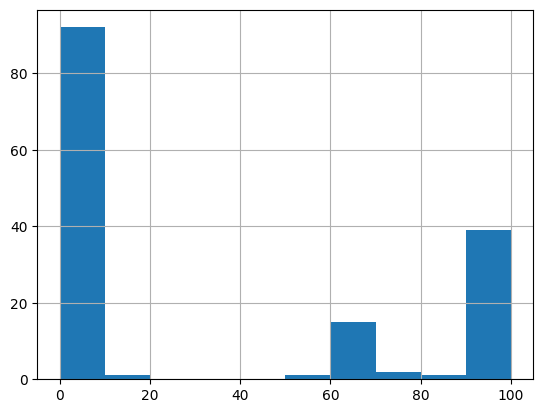

In [ ]:
col_null=col_null.sort_values('rate')
col_null.rate.hist()

In [ ]:
len(col_null[col_null.rate > 80]), len(col_null[(col_null.rate >= 20)&(col_null.rate <= 80)])

(40, 18)

40 cột bị null trên 80%.

18 cột null từ 20 đến 80%

Còn lại là các cột bị null ít.

Có thể xem xét giữa việc xoá cột/hàng hoặc điền giá trị

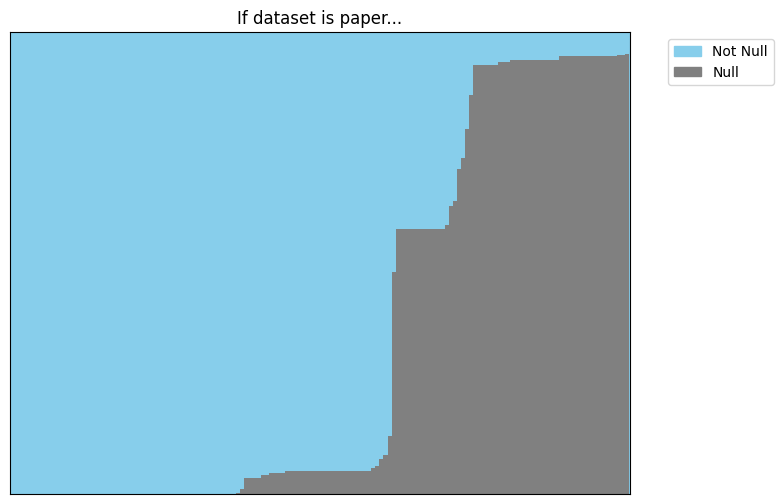

In [ ]:
# Nếu cả data là tờ giấy hình chữ nhật thì phần bị rách mất đi là Null :D
ax = col_null['rate'].plot(kind='bar', width=1, figsize=(8, 6), color='gray')
ax.set_facecolor('#87CEEB')
plt.xticks([])
plt.yticks([])
ax.legend(handles=[Patch(color='#87CEEB', label='Not Null'),
                   Patch(color='gray', label='Null')],
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("If dataset is paper...")
plt.show()

Theo chiều dọc là các cột, Có thể thấy có rất nhiều cột có % giá trị bị thiếu > 50%

In [ ]:
col_null[col_null.rate > 10]

,count,rate
mths_since_recent_inq,176820,13.117
mths_since_last_delinq,679942,50.439
inq_fi,810461,60.121
inq_last_12m,810462,60.121
total_cu_tl,810462,60.121
open_acc_6m,810462,60.121
max_bal_bc,810461,60.121
open_rv_24m,810461,60.121
open_rv_12m,810461,60.121
total_bal_il,810461,60.121


Các cột này liên quan đến lịch sử tài chính, các thông tin khác trong quá trình vay mượn.

Vì mục tiêu là dự đoán được khách hàng trước khi cho vay, nên có thể bỏ các cột trên.

In [ ]:
# Chọn mốc 50%
acc_df.drop(columns=col_null[col_null.rate > 50].index, inplace=True)
acc_df.shape

(1348059, 93)

In [ ]:
# Xuất file tạm, khởi động và đọc lại tránh tràn bộ nhớ
# acc_df.to_csv(root+'acc_df_drop_col.csv',index=False)
# rj_sample.to_csv(root+'rj_df_samples.csv', index=False)

In [3]:
acc_df = pd.read_csv(root+'acc_df_drop_col.csv')
rj_sample = pd.read_csv(root+'rj_df_samples.csv')

In [4]:
acc_df.shape

(1348059, 93)

In [5]:
acc_df.loan_status.value_counts()

Fully Paid     1078739
Charged Off     269320
Name: loan_status, dtype: int64

In [6]:
col_null = acc_df.groupby('loan_status').apply(lambda x: x.isnull().sum()).T.sort_values('Charged Off')
col_null['null_rate'] = ((col_null['Charged Off']+col_null['Fully Paid'])/len(acc_df) * 100)
col_null[(col_null['Charged Off'] > 0) | (col_null['Fully Paid'] > 0)]

loan_status,Charged Off,Fully Paid,null_rate
zip_code,0,1,0.000074
annual_inc,0,4,0.000297
delinq_2yrs,3,26,0.002151
earliest_cr_line,3,26,0.002151
inq_last_6mths,3,27,0.002225
pub_rec,3,26,0.002151
delinq_amnt,3,26,0.002151
total_acc,3,26,0.002151
open_acc,3,26,0.002151
acc_now_delinq,3,26,0.002151


Đa phần là các thông tin liên quan đến lịch sử tín dụng và tình trạng tài chính của người vay. Các thông tin này có thể được LendingClub thu thập được từ nhiều nguồn khác nhau trong quá trình xác thực hồ sơ.

Có 1 số cột có giá trị null giống nhau, có thể là null trên 1 hàng giống nhau.

*mths_since_recent_inq*: thời gian tính từ yêu cầu kiểm tra tín dụng gần nhất đến thời điểm hiện tại.

*num_tl_120dpd_2m*: Số lần trễ nợ 120 ngày trong 2 tháng gần nhất. Đây là cột xuất hiện trong quá trình vay, khi LC cần kiểm tra thông tin trễ hạn của người vay.

Có thể xoá 2 cột này vì có số lượng bản ghi null cao hơn nhiều so với các cột khác, và

Vẫn còn một số cột tạo ra trong quá trình cho vay, chẳng hạn *last_pymnt_d* (lần cuối thanh toán)

In [7]:
col_null[(col_null['Fully Paid'] > 42380)].index

Index(['acc_open_past_24mths', 'total_bc_limit', 'total_bal_ex_mort',
       'mort_acc', 'num_bc_sats', 'num_sats', 'mths_since_recent_bc',
       'bc_open_to_buy', 'percent_bc_gt_75', 'bc_util', 'num_rev_tl_bal_gt_0',
       'tot_hi_cred_lim', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'total_il_high_credit_limit', 'num_rev_accts',
       'tot_cur_bal', 'num_il_tl', 'total_rev_hi_lim', 'num_op_rev_tl',
       'num_accts_ever_120_pd', 'mo_sin_rcnt_tl', 'num_actv_rev_tl',
       'tot_coll_amt', 'num_actv_bc_tl', 'num_bc_tl', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_old_rev_tl_op', 'avg_cur_bal', 'pct_tl_nvr_dlq',
       'mo_sin_old_il_acct', 'emp_length', 'emp_title', 'num_tl_120dpd_2m',
       'mths_since_recent_inq'],
      dtype='object')

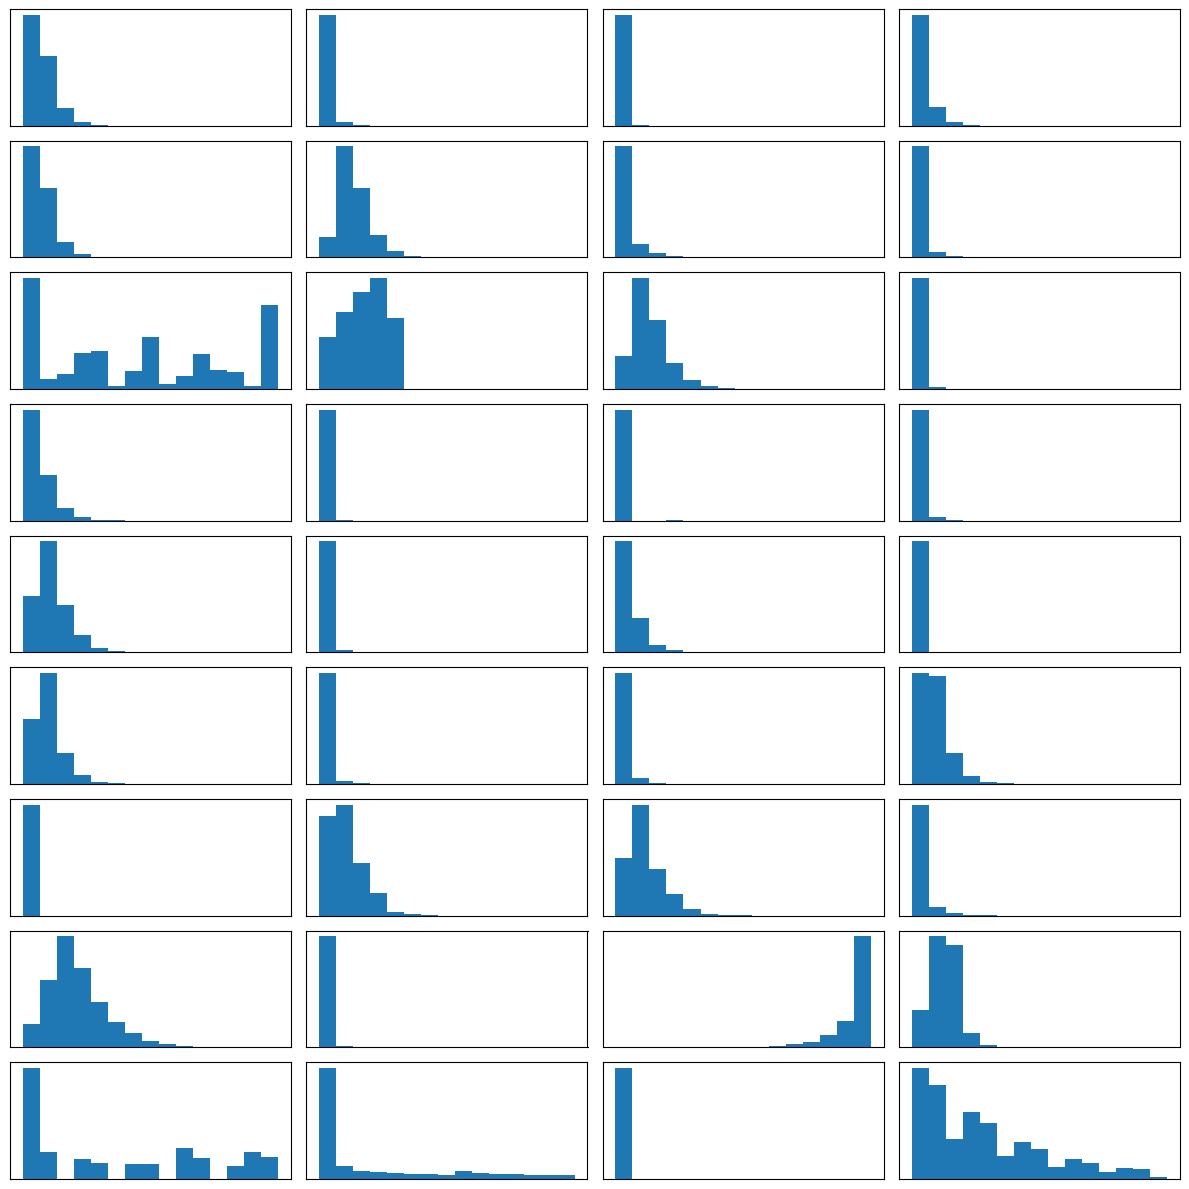

In [8]:
columns = col_null[(col_null['Fully Paid'] > 42380)].index.to_list()
ncols = 4
nrows = (len(columns) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
for i, col in enumerate(columns):
    ax = axes[i // ncols, i % ncols]
    acc_df[col].hist(ax=ax, bins=15)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()
plt.show()

Đa phần đều bị lệch, vì vậy:
- Lựa chọn giá trị trung vị để điền vào các giá trị bị thiếu với các cột kiểu giá trị liên tục
- Chọn giá trị mode với các cột kiểu giá trị categorical.

In [9]:
# Xoá cột xuất hiện trong quá trình cho vay, null nhiều
acc_df.drop(columns=['last_pymnt_d','mths_since_recent_inq','num_tl_120dpd_2m'],
            inplace = True)

In [10]:
acc_df.dropna().shape[0]/acc_df.shape[0]

0.8428088088132641

Nếu xoá sẽ mất đi ~16% khách hàng

In [11]:
all_null_columns = acc_df.columns[acc_df.isna().any()].to_list()
cols_object = acc_df[all_null_columns].select_dtypes(include=['object']).columns
cols_num = acc_df[all_null_columns].select_dtypes(exclude=['object']).columns
cols_object, cols_num

(Index(['emp_title', 'emp_length', 'title', 'zip_code', 'earliest_cr_line',
        'last_credit_pull_d'],
       dtype='object'),
 Index(['annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
        'pub_rec', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
        'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
        'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
        'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
        'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd',
        'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
        'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
        'num_sats', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
        'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
        'tax_liens', 'tot_hi_cred_lim', 'total_b

In [12]:
len(all_null_columns), len(cols_object)+len(cols_num)

(52, 52)

In [20]:
acc_df_copy = acc_df.copy()
# Thay thế các cột giá trị liên tục bằng trung vị
acc_df_copy[cols_num] = acc_df_copy[cols_num].fillna(acc_df_copy[cols_num].median())
# Thay thế với mode
acc_df_copy[cols_object] = acc_df_copy[cols_object].fillna(acc_df_copy[cols_object].mode().iloc[0])

In [21]:
acc_df_copy.isnull().sum().sum()

0

Không còn giá trị NaN nào nữa!

In [22]:
acc_df_copy.shape

(1348059, 90)

In [23]:
acc_df_copy.loan_status.value_counts()

Fully Paid     1078739
Charged Off     269320
Name: loan_status, dtype: int64

## 3. Kiểu dữ liệu

In [24]:
acc_df_copy.dtypes

id                              int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
                               ...   
total_bc_limit                float64
total_il_high_credit_limit    float64
hardship_flag                  object
disbursement_method            object
debt_settlement_flag           object
Length: 90, dtype: object

In [25]:
acc_df_copy.select_dtypes('object').head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,...,Debt consolidation,190xx,PA,Aug-2003,w,Mar-2019,Individual,N,Cash,N
1,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,...,Business,577xx,SD,Dec-1999,w,Mar-2019,Individual,N,Cash,N
2,60 months,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,...,Debt consolidation,605xx,IL,Aug-2000,w,Mar-2019,Joint App,N,Cash,N
3,60 months,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,n,...,Major purchase,174xx,PA,Jun-1998,w,Mar-2018,Individual,N,Cash,N
4,36 months,C,C3,Veterinary Tecnician,4 years,RENT,Source Verified,Dec-2015,Fully Paid,n,...,Debt consolidation,300xx,GA,Oct-1987,w,May-2017,Individual,N,Cash,N


- term: Bỏ 'months'
- emp_length: Bỏ 'years'
- issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d: Chuyển về datetime
- zip_code: Do bảo mật nên không cho xem cụ thể nên có thể vẫn để lại.

Khi xây dựng mô hình, nếu cột được chọn là object, có thể chuyển thành kiểu số hoặc xử lý thêm (gán 0,1 hoặc gán giá trị theo thứ bậc)

In [26]:
acc_df_copy['term'] = acc_df_copy['term'].str.replace('months', '').astype(int)
acc_df_copy['emp_length'] = acc_df_copy['emp_length'].str.extract('(\d+)').astype(int)
acc_df_copy['issue_d'] = pd.to_datetime(acc_df_copy['issue_d'])
acc_df_copy['earliest_cr_line'] = pd.to_datetime(acc_df_copy['earliest_cr_line'])
acc_df_copy['last_credit_pull_d'] = pd.to_datetime(acc_df_copy['last_credit_pull_d'])

## 4. Lọc cột
- Bỏ cột chỉ có 1 giá trị
- Giữ các một vài cột từ tập rejected.
- Cột tương quan cao với nhau hoặc trùng lặp, có thể do quá trình thu thập từ 2 bảng cùng giá trị nhưng khác tên cột.
- Các cột có thể có khi trong quá trình xử lý hồ sơ.



In [27]:
acc_df_copy.shape

(1348059, 90)

In [28]:
df = acc_df_copy.copy()
df.shape

(1348059, 90)

In [29]:
for c in df.columns:
    num_uni = len(df[c].unique())
    if num_uni == 1:
        print(f"'{c}',")

'pymnt_plan',
'out_prncp',
'out_prncp_inv',
'policy_code',
'hardship_flag',


Xoá 5 cột trên vì chỉ có 1 giá trị duy nhất

In [30]:
df.drop(columns=['pymnt_plan',
                'out_prncp',
                'out_prncp_inv',
                'policy_code',
                'hardship_flag',],
        inplace = True)
df.shape

(1348059, 85)

In [31]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt

Có những cột khách hàng có thể khai gian. Dựa trên các cột tập rejected, có thể chọn được 3 cột: loan_amnt, dti, addr_state

**grade, sub_grade**

In [32]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [33]:
df['sub_grade'].unique()

array(['C4', 'C1', 'B4', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2', 'E2',
       'A4', 'E3', 'C5', 'A1', 'D4', 'F3', 'D1', 'B3', 'D3', 'D5', 'A5',
       'F2', 'E4', 'D2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5'], dtype=object)

Các giá trị sub_title thêm các số từ 1-5 sau grade

**purpose, title**

In [34]:
print(df.purpose.value_counts())
print()
df.title.value_counts()

debt_consolidation    781421
credit_card           295619
home_improvement       87718
other                  78299
major_purchase         29548
medical                15612
small_business         15577
car                    14649
moving                  9526
vacation                9084
house                   7297
wedding                 2350
renewable_energy         936
educational              423
Name: purpose, dtype: int64



Debt consolidation             677634
Credit card refinancing        249911
Home improvement                75080
Other                           66778
Major purchase                  24045
                                ...  
Great Vegas Borrower                1
personal deb consolidation          1
Home Loan Downpayment               1
HeatingAndAirConditioning           1
debt reduction/hone updates         1
Name: title, Length: 63152, dtype: int64

Gần như giống nhau, có thể purpose là trong quá trình xử lý và được phân loại; title là nội dung mà khách hàng khai trong đơn vay.


**zip_code, addr_state**

Có thể giữ lại addr_state, bỏ zip_code


In [35]:
df.addr_state.unique(), len(df.addr_state.unique())

(array(['PA', 'SD', 'IL', 'GA', 'MN', 'SC', 'RI', 'NC', 'CA', 'VA', 'AZ',
        'IN', 'MD', 'NY', 'TX', 'KS', 'NM', 'AL', 'WA', 'OH', 'LA', 'FL',
        'CO', 'MI', 'MO', 'DC', 'MA', 'WI', 'HI', 'VT', 'NJ', 'DE', 'TN',
        'NH', 'NE', 'OR', 'CT', 'AR', 'NV', 'WV', 'MT', 'WY', 'OK', 'KY',
        'MS', 'UT', 'ND', 'ME', 'AK', 'ID', 'IA'], dtype=object),
 51)

**Loại bỏ 1 số cột kiểu object không cần thiết**

In [36]:
df.select_dtypes('object').head()

,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,url,purpose,title,zip_code,addr_state,initial_list_status,application_type,disbursement_method,debt_settlement_flag
0,C,C4,leadman,MORTGAGE,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,w,Individual,Cash,N
1,C,C1,Engineer,MORTGAGE,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,w,Individual,Cash,N
2,B,B4,truck driver,MORTGAGE,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Debt consolidation,605xx,IL,w,Joint App,Cash,N
3,F,F1,Contract Specialist,MORTGAGE,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,w,Individual,Cash,N
4,C,C3,Veterinary Tecnician,RENT,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,300xx,GA,w,Individual,Cash,N


In [37]:
df.debt_settlement_flag.value_counts()

N    1314773
Y      33286
Name: debt_settlement_flag, dtype: int64

In [38]:
df.drop(columns=['grade','title','zip_code','url','emp_title',
                 'disbursement_method','debt_settlement_flag'], inplace=True)

**Độ tương quan**

In [39]:
corr = abs(df.corr())
pairs = corr.unstack().sort_values(ascending=False)

corr_df = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_df.columns = ['col1', 'col2', 'corr']

<ipython-input-39-c68abdeac3b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = abs(df.corr())


In [40]:
df_corr_high = corr_df[(corr_df.col1 != corr_df.col2) & (corr_df['corr']>0.6)]
df_corr_high

,col1,col2,corr
1,fico_range_high,fico_range_low,1.000000
2,loan_amnt,funded_amnt,0.999545
3,total_pymnt_inv,total_pymnt,0.999076
4,funded_amnt_inv,funded_amnt,0.998777
5,loan_amnt,funded_amnt_inv,0.998214
...,...,...,...
72,num_op_rev_tl,num_bc_tl,0.620820
73,num_bc_sats,num_sats,0.614483
74,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,0.612736
75,total_acc,num_bc_tl,0.610402


In [41]:
rs_df = df_corr_high.groupby('col1').apply(lambda group: group['col2'].tolist()).reset_index(name='col2_values')
cols_del = []
for col2 in rs_df.col2_values:
    for x in col2:
        cols_del.append(x)
cols_del = set(cols_del)
cols_del.remove('loan_amnt')

df.drop(cols_del, axis=1, inplace=True)

In [42]:
df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_high', 'inq_last_6mths', 'pub_rec',
       'initial_list_status', 'total_rec_late_fee', 'recoveries',
       'last_credit_pull_d', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'application_type', 'tot_coll_amt',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_il_tl',
       'num_tl_30dpd', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'total_bc_limit'],
      dtype='object')

In [44]:
# Loại bỏ các cột có trong lịch sử vay, thời gian sau lúc đăng ký
col_drop=['total_rec_late_fee','chargeoff_within_12_mths',
        'issue_d','last_credit_pull_d','collections_12_mths_ex_med','tot_coll_amt','delinq_amnt',
        'recoveries']
df.drop(columns=col_drop,inplace=True)

In [45]:
df.shape

(1348059, 35)

## Bất thường

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1348059.0,5.623089e+07,3.840504e+07,54734.00,1.972664e+07,57673953.00,84505285.50,1.456364e+08
loan_amnt,1348059.0,1.440900e+04,8.716090e+03,500.00,7.975000e+03,12000.00,20000.00,4.000000e+04
term,1348059.0,4.178392e+01,1.026453e+01,36.00,3.600000e+01,36.00,36.00,6.000000e+01
int_rate,1348059.0,1.324148e+01,4.765619e+00,5.31,9.750000e+00,12.74,15.99,3.099000e+01
emp_length,1348059.0,6.277861e+00,3.578571e+00,1.00,3.000000e+00,7.00,10.00,1.000000e+01
annual_inc,1348059.0,7.623777e+04,6.992289e+04,0.00,4.575023e+04,65000.00,90000.00,1.099920e+07
dti,1348059.0,1.827410e+01,1.115398e+01,-1.00,1.179000e+01,17.61,24.05,9.990000e+02
delinq_2yrs,1348059.0,3.176285e-01,8.777452e-01,0.00,0.000000e+00,0.00,0.00,3.900000e+01
fico_range_high,1348059.0,7.001622e+02,3.185115e+01,614.00,6.740000e+02,694.00,714.00,8.500000e+02
inq_last_6mths,1348059.0,6.621943e-01,9.600707e-01,0.00,0.000000e+00,0.00,1.00,3.300000e+01


dti có giá trị = -1?

In [47]:
df[df.dti < 0]

,id,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,mths_since_recent_bc,num_accts_ever_120_pd,num_il_tl,num_tl_30dpd,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit
582670,74636850,15000.0,36,9.75,B3,5,MORTGAGE,94000.0,Source Verified,Fully Paid,...,15.0,0.0,10.0,0.0,3.0,95.8,33.3,127743.0,93070.0,10300.0
972939,99827944,17000.0,60,13.49,C2,10,MORTGAGE,75000.0,Not Verified,Fully Paid,...,27.0,0.0,9.0,0.0,1.0,91.2,40.0,333184.0,84919.0,31100.0


Chỉ có 2 giá trị, có thể LC chưa xác nhận được thông tin. Xoá 2 dòng này

In [48]:
df.drop(df[df.dti < 0].index, inplace=True)

# Lưu file làm sạch



In [49]:
df.shape

(1348057, 35)

In [50]:
df.loan_status.value_counts()

Fully Paid     1078737
Charged Off     269320
Name: loan_status, dtype: int64

In [51]:
df.to_csv(root+"cleaned.csv", index=False)

# Phân tích dữ liệu
Trước khi xây dựng mô hình học máy, chúng ta cần tìm hiểu rõ về tính chất, tương quan lẫn nhau của một vài thuộc tính có trong dữ liệu.

In [55]:
acc_df = pd.read_csv(root+"cleaned.csv")

In [56]:
acc_df.sample(5)

,id,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,mths_since_recent_bc,num_accts_ever_120_pd,num_il_tl,num_tl_30dpd,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit
529593,110085747,9600.0,36,9.93,B2,10,OWN,36000.0,Not Verified,Fully Paid,...,177.0,0.0,13.0,0.0,1.0,100.0,0.0,68250.0,13647.0,24000.0
995152,96485667,36000.0,60,10.49,B2,10,MORTGAGE,120000.0,Source Verified,Fully Paid,...,20.0,0.0,5.0,0.0,0.0,96.0,25.0,423825.0,35878.0,53700.0
786977,20488823,24000.0,36,8.39,A5,7,RENT,85000.0,Source Verified,Fully Paid,...,74.0,0.0,4.0,0.0,0.0,100.0,20.0,83005.0,44319.0,51600.0
743000,27340193,3600.0,36,6.49,A2,1,RENT,25000.0,Not Verified,Fully Paid,...,14.0,0.0,8.0,0.0,0.0,100.0,0.0,73838.0,15756.0,60200.0
93377,61903114,10400.0,36,12.69,C2,8,RENT,75000.0,Not Verified,Charged Off,...,8.0,5.0,6.0,0.0,3.0,64.7,60.0,47388.0,23192.0,20600.0


In [57]:
acc_df.shape

(1348057, 35)

## loan_status

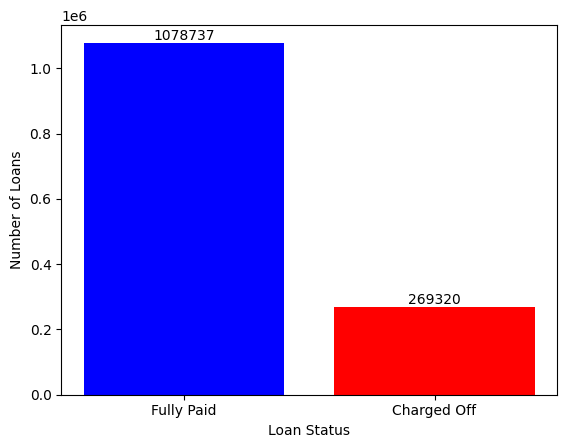

In [67]:
ax = plt.bar(acc_df['loan_status'].value_counts().keys(),
        acc_df['loan_status'].value_counts().values,
        color= ['b', 'r'])
for bar in ax:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.show()

Dữ liệu bị mất cân bằng, trung bình cứ 10 người được vay thì 2 người không trả được nợ

## loan_amnt

In [58]:
acc_df.loan_amnt.min(), acc_df.loan_amnt.max()

(500.0, 40000.0)

- Khách hàng được vay từ 500 đến 40000 đô

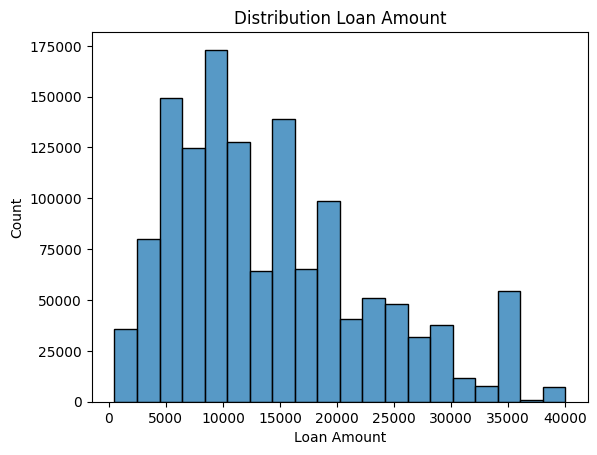

In [72]:
sns.histplot(acc_df.loan_amnt, bins=20)

plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution Loan Amount')
plt.show()

- Đa phần khách hàng muốn vay khoản dưới 20000$

- Khách hàng thường vay ở các mốc là bội của 5000$

In [59]:
df_total_loan =  acc_df.groupby('loan_status')['loan_amnt'].sum().reset_index()
df_total_loan['Percent'] = (df_total_loan.loan_amnt / df_total_loan.loan_amnt.sum())*100
df_total_loan

,loan_status,loan_amnt,Percent
0,Charged Off,4.187386e+09,21.557627
1,Fully Paid,1.523677e+10,78.442373


In [60]:
df_total_loan.loan_amnt[0], df_total_loan.loan_amnt[1]

(4187385950.0, 15236765050.0)

- Tổng số tiền cho vay là 19,424,151,000 USD.
- Tổng số tiền cho khách hàng không trả được vay: 4,187,385,950 chiếm 21.56% tổng tiền cho vay
- Tổng số tiền cho khách hàng trả được nợ vay: 15,236,765,050 chiếm 78.44%.

Dù chưa tính % lãi từ số tiền cho vay mà khách hàng trả. Nhưng công ty vẫn khiến bên cho vay mất số tiền lớn, làm giảm độ uy tín của công ty.

## term

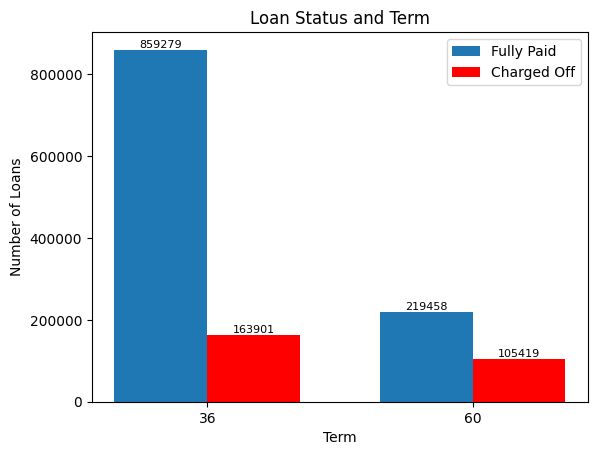

In [68]:
counts_FP = acc_df.term[acc_df.loan_status == 'Fully Paid'].value_counts()
counts_CO = acc_df.term[acc_df.loan_status == 'Charged Off'].value_counts()

fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(counts_FP))

bar1 = ax.bar(index, counts_FP, bar_width, label='Fully Paid')
bar2 = ax.bar([i + bar_width for i in index], counts_CO, bar_width, label='Charged Off', color='r')

for i, value in enumerate(counts_FP):
    ax.text(i, value, str(value), ha='center', va='bottom', fontsize=8, color='black')

for i, value in enumerate(counts_CO):
    ax.text(i + bar_width, value, str(value), ha='center', va='bottom', fontsize=8, color='black')

ax.set_xlabel('Term')
ax.set_ylabel('Number of Loans')
ax.set_title('Loan Status and Term')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(counts_FP.index)
ax.legend()
plt.show()

- Tổng số người vay ở kỳ hạn 36 tháng nhiều hơn so với 60 tháng, gấp hơn 3 lần.

- Tỉ lệ những người trả được nợ ở kỳ hạn 36 tháng nhiều hơn khách hàng ở kì hạn 60 tháng. Số người không trả được nợ ở kì hạn 60 tháng bằng 1 nửa so với số người trả được nợ.

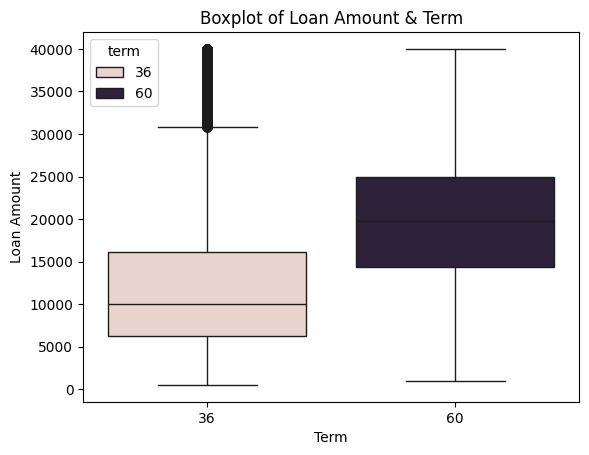

In [80]:
sns.boxplot(data=acc_df, x='term', y='loan_amnt', hue='term')
plt.xlabel('Term')
plt.ylabel('Loan Amount')
plt.title('Boxplot of Loan Amount & Term')
plt.show()

In [84]:
acc_df.groupby('term')['loan_amnt'].mean()

term
36    12538.760067
60    20299.197773
Name: loan_amnt, dtype: float64

- Khách hàng đều có thể vay từ 500-40000$ ở cả 2 loại kì hạn vay

- Trung bình số tiền mà người vay ở kì hạn 36 tháng sẽ ít hơn so với kì hạn 60 tháng.
- 50% khách hàng nhóm kì hạn 36 tháng vay ít hơn 10000$

- 50% khách hàng nhóm kì hạn 60 tháng vay nhiều hơn 20000$


## int_rate, sub_grade

In [86]:
acc_df.int_rate.describe()

count    1.348057e+06
mean     1.324148e+01
std      4.765622e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

- Lãi suất thấp nhất là: 5.31%/năm
- Lãi suất cao nhất là: 30.99%/năm
- Lãi suất trung bình là: 13.32% /năm

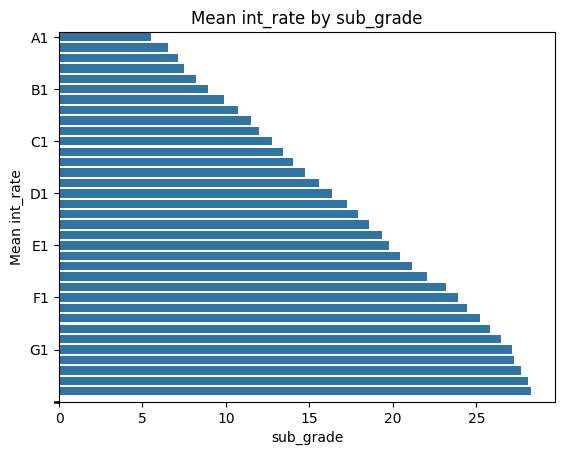

In [102]:
df_ir = acc_df.groupby('sub_grade')['int_rate'].mean().reset_index().sort_values('sub_grade')

sns.barplot(data=df_ir,x='int_rate', y='sub_grade')
lst_tick = []
for i,label in enumerate(df_ir.sub_grade):
    if i%5 == 0:
        lst_tick.append(label)
    else:
        lst_tick.append('')
plt.yticks(lst_tick)
plt.xlabel('sub_grade')
plt.ylabel('Mean int_rate')
plt.title('Mean int_rate by sub_grade')
plt.show()

- Mỗi khách hàng được gán nhãn theo thứ tự chữ cái và đuôi số từ 1-5, nhãn gần tới A1 thì lãi suất càng thấp.

# Xây dựng mô hình

In [ ]:
train_df = acc_df.copy()

In [ ]:
train_df.select_dtypes('object').head()

,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status,application_type
0,C4,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,PA,w,Individual
1,C1,MORTGAGE,Not Verified,Fully Paid,small_business,SD,w,Individual
2,B4,MORTGAGE,Not Verified,Fully Paid,home_improvement,IL,w,Joint App
3,F1,MORTGAGE,Source Verified,Fully Paid,major_purchase,PA,w,Individual
4,C3,RENT,Source Verified,Fully Paid,debt_consolidation,GA,w,Individual


In [ ]:
# Sắp xếp theo mức độ sở hữu nhà
home_owner_dic = {
            'NONE': 0,
            'OTHER': 1,
            'RENT': 2,
            'MORTGAGE': 3,
            'OWN': 4,
            'ANY': 5, }
# Sắp xếp và đánh cấp bậc từ A1 đến G5
sub_grade_map = {v:i+1 for i,v in enumerate(sorted(train_df['sub_grade'].unique()))}
# Gán nhãn
loan_status_dic = {"Fully Paid" : 1,
                   "Charged Off": 0 }
initial_list_status_dic = {'w': 2,
                       'f': 1}
app_type = {'Individual':1,
            'Joint App':2}

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Loại bỏ purpose, id
train_df.drop(columns=['purpose','id'],inplace=True)
# Mã hoá
train_df.home_ownership = train_df.home_ownership.map(home_owner_dic)
train_df.sub_grade = train_df['sub_grade'].map(sub_grade_map)
train_df.loan_status = train_df['loan_status'].map(loan_status_dic)
train_df.initial_list_status = train_df.initial_list_status.map(initial_list_status_dic)
train_df.application_type = train_df.application_type.map(app_type)
train_df.verification_status = train_df.verification_status.map({'Source Verified':1,'Verified':1,
                                                              'Not Verified':0})
train_df = train_df.drop(columns=train_df.select_dtypes(include=['datetime']).columns)
encoder = LabelEncoder()
train_df['addr_state'] = encoder.fit_transform(train_df['addr_state'])

In [ ]:
encoder.classes_

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [ ]:
X = train_df.drop(columns=['loan_status'])
y = train_df.loan_status
cols_X = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, y_test.shape

((1078445, 31), (269612,))

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
cols_X

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'addr_state',
       'dti', 'fico_range_high', 'inq_last_6mths', 'initial_list_status',
       'last_fico_range_low', 'application_type', 'acc_open_past_24mths',
       'bc_open_to_buy', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq',
       'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort'],
      dtype='object')

### Random Forest Classifier & chọn thuộc tính

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

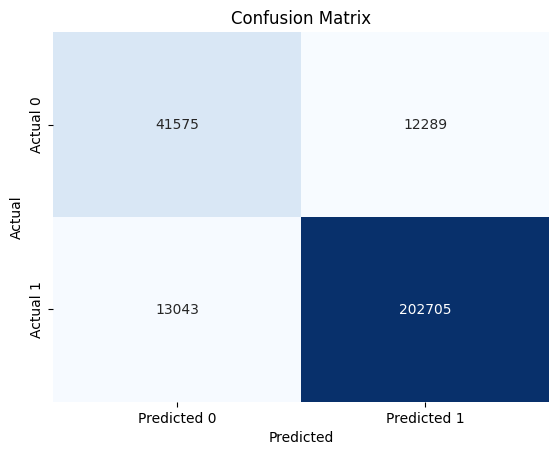

In [ ]:
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77     53864
           1       0.94      0.94      0.94    215748

    accuracy                           0.91    269612
   macro avg       0.85      0.86      0.85    269612
weighted avg       0.91      0.91      0.91    269612



In [ ]:
# Đánh giá trên tập test
y_proba = rf_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

AUC Score: 0.9452109139796002


Recall nhãn 0 khá tốt trên tập test, đạt 0.77. Mô hình dự đoán khá chính xác nhóm người không trả được nợ

Weighted F1-score = 0.91, AUC = 0.945.

Mô hình đã có sự cân bằng độ chính xác giữa các lớp khả năng phân loại của mô hình tốt


**Chọn 20 thuộc tính**

In [ ]:
ntop = 20
fi = rf_model.feature_importances_
fi_df = pd.DataFrame({'Feature': cols_X[np.argsort(fi)[::-1][:ntop]],
                      'Importance': sorted(fi)[::-1][:ntop]})

fi_df['Feature']

0       last_fico_range_low
1                  int_rate
2                       dti
3                 loan_amnt
4            bc_open_to_buy
5                 sub_grade
6           tot_hi_cred_lim
7      mo_sin_old_rev_tl_op
8                annual_inc
9         total_bal_ex_mort
10       mo_sin_old_il_acct
11     mths_since_recent_bc
12               addr_state
13          fico_range_high
14    mths_since_recent_inq
15           mo_sin_rcnt_tl
16     acc_open_past_24mths
17           pct_tl_nvr_dlq
18                     term
19               emp_length
Name: Feature, dtype: object

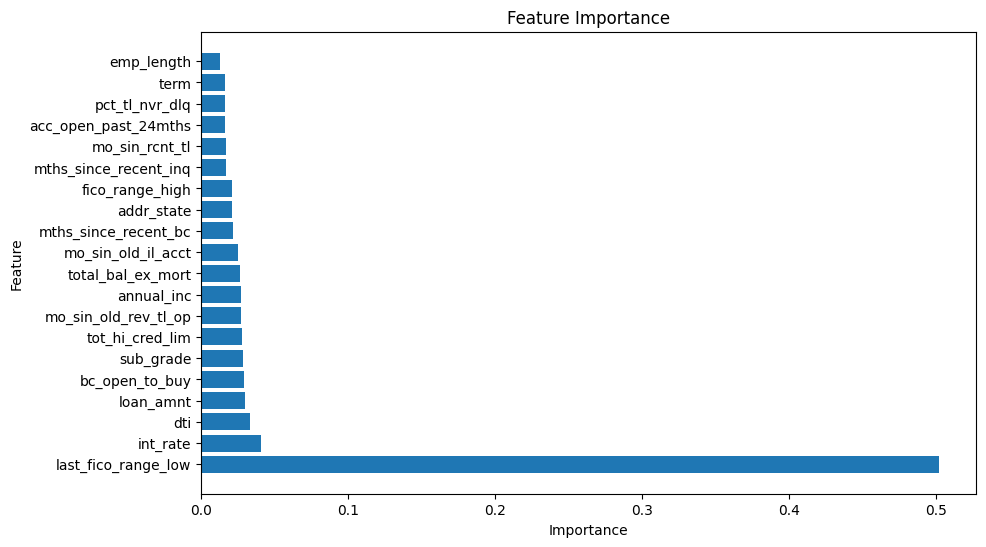

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

- **last_fico_range_low:** Điểm FICO thấp nhất của khách hàng gần đây nhất
- **int_rate:** Tỉ lệ lãi suất hàng năm cho khoản vay
- **dti:** Tỷ lệ nợ/thu nhập của khách hàng
- **loan_amnt:** Số tiền vay của khách hàng
- **bc_open_to_buy:** Số tiền khả dụng để mua hàng cho tài khoản tín dụng mở.
- **sub_grade:** Phân loại điểm tín dụng của mỗi khách hàng
- **tot_hi_cred_lim:** Tổng giới hạn tín dụng của tất cả các tài khoản.
- **mo_sin_old_rev_tl_op:** Số tháng kể từ lúc mở tài khoản tín dụng quay vòng.
- **annual_inc:** Thu nhập hằng năm của khách hàng.
- **total_bal_ex_mort:** Tổng số dư tài khoản tín dụng ngoại trừ tài khoản thế chấp.
- **mo_sin_old_il_acct:** Số tháng kể từ lúc mở tài khoản tín dụng trả góp.
- **mths_since_recent_bc:** Số tháng kể từ lúc khách hàng có tài khoản tín dụng quay vòng gần đây.
- **addr_state:** Bang nơi khách hàng sống
- **fico_range_high:** Điểm FICO cao nhất
- **mths_since_recent_inq:** Số tháng kể từ lúc khách hàng có yêu cầu tín dụng gần đây.
- **mo_sin_rcnt_tl:** Số tháng kể từ lúc mở tài khoản tín dụng gần đây.
- **acc_open_past_24mths:** Số tài khoản được mở trong 24 tháng gần đây.
- **pct_tl_nvr_dlq:** Tỷ lệ tài khoản không bao giờ quá hạn trên tổng số tài khoản khách hàng đang có.
- **term:** Thời hạn cho vay (36 hoặc 60 tháng).
- **emp_length:** Số năm làm việc hiện tại của khách hàng.

## Logistic Regression

Sau khi lựa chọn thuộc tính, thử với mô hình đơn giản, dễ giải thích.


In [ ]:
X_ = X[fi_df['Feature']]
y = train_df.loan_status

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, stratify=y)
X_train.shape, y_test.shape

# Logistic có thể không cần chuẩn hoá

((1078445, 20), (269612,))

In [ ]:
lr = LogisticRegression(max_iter=10000, class_weight ='balanced')
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

Chọn ngưỡng phù hợp để cân bằng giữa recall và precision

(0.0, 1.0)

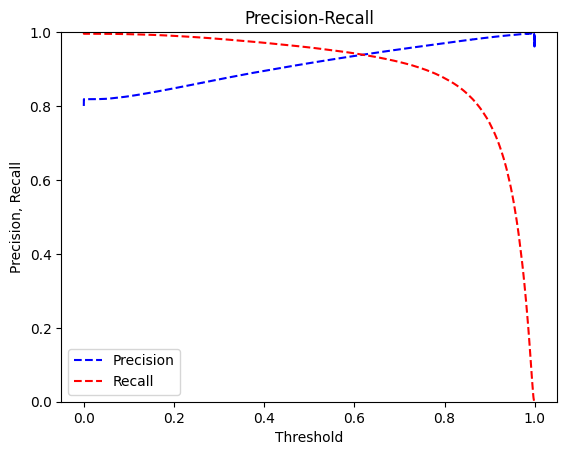

In [ ]:
pred_y = lr.predict(X_train)
probs_y= lr.predict_proba(X_train)
precision, recall, thresholds = precision_recall_curve(y_train, probs_y[:, 1])
pr_auc = auc(recall, precision)

plt.title("Precision-Recall")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [ ]:
threshold = round(thresholds[np.argmax(precision[:-1] + recall[:-1])],1)
print("Threshold phù hợp:", threshold)

Threshold phù hợp: 0.6


Đánh giá trên tập test

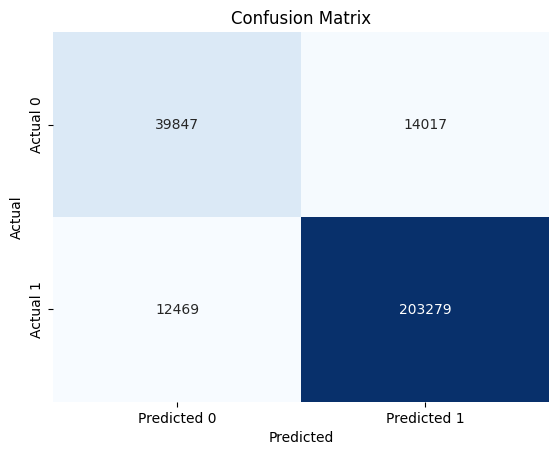

In [ ]:
y_pred =  (lr.predict_proba(X_test)[:, 1] >= threshold).astype(int)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

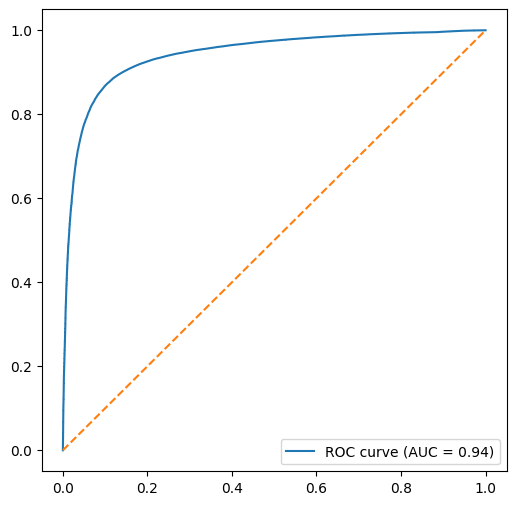

In [ ]:
y_prob = lr.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_prob >= threshold).astype(int)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_lr = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_threshold))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     53864
           1       0.94      0.94      0.94    215748

    accuracy                           0.90    269612
   macro avg       0.85      0.84      0.84    269612
weighted avg       0.90      0.90      0.90    269612



Mô hình vẫn dự đoán tốt.
- F1-score = 0.9
- AUC = 0.94

## Decision Tree

In [ ]:
y.value_counts()

1    1078737
0     269320
Name: loan_status, dtype: int64

In [ ]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
y_prob = dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

AUC Score: 0.777528646250744
[[ 34403  19461]
 [ 18046 197702]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65     53864
           1       0.91      0.92      0.91    215748

    accuracy                           0.86    269612
   macro avg       0.78      0.78      0.78    269612
weighted avg       0.86      0.86      0.86    269612



AUC, F1-score thấp hơn so với LogisticRegression

## Đánh giá mô hình
Dựa trên AUC, F1-Score


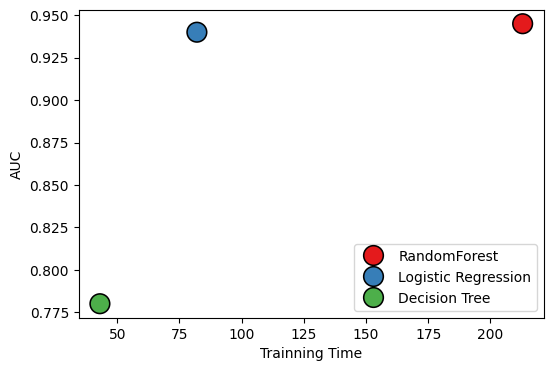

In [112]:
auc = [ 0.945,
        0.94,
        0.78,]
f1 = [0.91,
      0.9,
      0.86]
training_time = [213, 82, 43]

name_md = ['RandomForest', 'Logistic Regression', 'Decision Tree']
data = {'Training Time': training_time, 'AUC': auc, 'F1_Score':f1, 'Model': name_md}
evaluate_df = pd.DataFrame(data)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=evaluate_df, x='Training Time', y='AUC', hue='Model', s=200, palette='Set1', edgecolor='black')

plt.legend()
plt.xlabel("Trainning Time")
plt.ylabel("AUC")
plt.show()

F1-Score của cả 3 đều khá tốt, không chênh lệch quá nhiều.

Sử dụng RandomForest, Decision Tree sẽ khó giải thích và triển khai mô hình.

Có thể thấy RandomForest chạy mất khá nhiều thời gian, dù có AUC tốt.

Decision Tree tuy chạy nhanh nhất nhưng AUC không bằng LogisticRegression.

=> Vậy sử dụng Logistic Regression để dự đoán.

Lưu ý, vẫn cần mô hình chấm điểm của LendingClub hiện tại. Chỉ sử dụng mô hình này lần nữa để kiểm tra trong tập khách hàng được chấp nhận cho vay xem ai là người có khả năng không trả được nợ. (Dự đoán 2 lần với 2 mô hình khác nhau, mô hình này là thứ 2)


# Áp dụng

In [ ]:
lr.coef_

array([[ 2.36298477e-02, -1.48699031e-02, -1.39580567e-02,
        -2.54374986e-05,  6.08419929e-06, -2.01347218e-02,
         9.25346540e-07, -1.38987682e-03,  8.53835220e-07,
        -9.33066986e-07, -3.14079520e-04,  3.76109809e-03,
        -1.36650209e-03, -1.50900592e-02,  2.53181441e-03,
         3.94263318e-03, -5.28442106e-03, -8.11544219e-03,
        -2.89898478e-02, -1.20048048e-03]])

In [ ]:
lr.intercept_

array([-0.00014958])

In [ ]:
X[fi_df['Feature']].columns

Index(['last_fico_range_low', 'int_rate', 'dti', 'loan_amnt', 'bc_open_to_buy',
       'sub_grade', 'tot_hi_cred_lim', 'mo_sin_old_rev_tl_op', 'annual_inc',
       'total_bal_ex_mort', 'mo_sin_old_il_acct', 'mths_since_recent_bc',
       'addr_state', 'fico_range_high', 'mths_since_recent_inq',
       'mo_sin_rcnt_tl', 'acc_open_past_24mths', 'pct_tl_nvr_dlq', 'term',
       'emp_length'],
      dtype='object')

In [ ]:
coef = [ 2.36298477e-02, -1.48699031e-02, -1.39580567e-02,
        -2.54374986e-05,  6.08419929e-06, -2.01347218e-02,
         9.25346540e-07, -1.38987682e-03,  8.53835220e-07,
        -9.33066986e-07, -3.14079520e-04,  3.76109809e-03,
        -1.36650209e-03, -1.50900592e-02,  2.53181441e-03,
         3.94263318e-03, -5.28442106e-03, -8.11544219e-03,
        -2.89898478e-02, -1.20048048e-03]
cols = ['last_fico_range_low', 'int_rate', 'dti', 'loan_amnt', 'bc_open_to_buy',
       'sub_grade', 'tot_hi_cred_lim', 'mo_sin_old_rev_tl_op', 'annual_inc',
       'total_bal_ex_mort', 'mo_sin_old_il_acct', 'mths_since_recent_bc',
       'addr_state', 'fico_range_high', 'mths_since_recent_inq',
       'mo_sin_rcnt_tl', 'acc_open_past_24mths', 'pct_tl_nvr_dlq', 'term',
       'emp_length']
intercept = -0.00014958

In [ ]:
encoder.classes_

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

## Trước và sau khi áp dụng mô hình

Xem tổng số tiền mà những người không trả được nợ đã vay của LC

In [ ]:
train_df.loan_status.value_counts()

1    1078737
0     269320
Name: loan_status, dtype: int64

In [ ]:
len(train_df)

1348057

Mô hình đoán là 0: Tức không cho vay, tuy nhiên lợi nhuận thất thoát chính là những người có khả năng trả nợ được nhưng mô hình đoán là không.

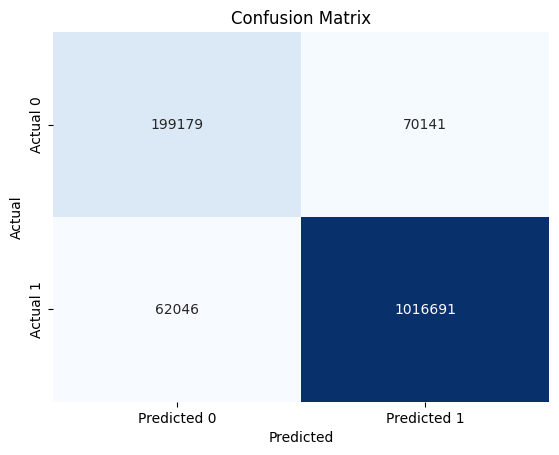

In [ ]:
# Dự đoán trên cả tập
y_pred_mask = (lr.predict_proba(X_)[:, 1] >= threshold).astype(int)
cm = confusion_matrix(y,y_pred_mask)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TP, FP, TN, FN = [], [], [], []
for true_label, predicted_label in zip(y, y_pred_mask):
    TP.append(1 if (true_label == 1 and predicted_label == 1) else 0)
    FP.append(1 if (true_label == 0 and predicted_label == 1) else 0)
    TN.append(1 if (true_label == 0 and predicted_label == 0) else 0)
    FN.append(1 if (true_label == 1 and predicted_label == 0) else 0)

In [ ]:
# Những người thực sự trả được nợ, LC có lợi nhuận từ tp
tp = (train_df['loan_amnt'][np.array(TP)==1] * (1+(train_df['int_rate'][np.array(TP)==1]/100))).sum()
# Những người dự đoán là 1 nhưng thực tế là 0, LC mất tiền từ fp
fp_loss = (train_df['loan_amnt'][np.array(FP)==1]).sum()
# Những người dự đoán là 0, LC không cho vay nên không sao
tn = (train_df['loan_amnt'][np.array(FP)==1]).sum()
# Những người dự đoán là 0 nhưng thực tế là 1, thất thoát đi phần lợi nhuận
fn = (train_df['loan_amnt'][np.array(FN)==1] * (train_df['int_rate'][np.array(FN)==1]/100)).sum()

In [ ]:
before = train_df['loan_amnt'][train_df.loan_status==0].sum()
print("Trước khi có mô hình, số tiền LC cho người không trả được vay:", before)
print("Sau khi có mô hình, số tiền LC cho người không trả được vay:", fp_loss)
print("Giảm được",before-fp_loss,"$ thất thoát")

Trước khi có mô hình, số tiền LC cho người không trả được vay: 4187385950.0
Sau khi có mô hình, số tiền LC cho người không trả được vay: 961626350.0
Giảm được 3225759600.0 $ thất thoát


Tuy nhiên cần tính toán số tiền thất thoát từ việc mất khách hàng có thể trả được mà mô hình đoán là không trả được

In [ ]:
# tiền thất thoát nếu khách hàng không trả được
v1 = train_df['loan_amnt'][train_df.loan_status == 0].sum()
#  doanh thu từ khách hàng trả được, bao gồm lãi suất cho vay, tính theo 1 năm.
v2 = (train_df['loan_amnt'][train_df.loan_status == 1] * (1+(train_df['int_rate'][train_df.loan_status == 1]/100))).sum()

In [ ]:
# Lãi = doanh thu - chi phí - thất thoát
# Tính trên toàn bộ tập dữ liệu
base_profit = (v2 - train_df['loan_amnt'].sum()-v1)
base_profit

-6404814430.185001

Trước khi có mô hình, công ty đang khiến cho bên cho vay lỗ tổng số tiền rất nhiều !!!

In [ ]:
# Lãi bằng
#    lợi nhuận từ khách hàng 1 đoán đúng (tp)
# - số tiền thất thoát từ khách hàng 0 đoán nhầm là 1 (fp_loss)
# - lợi nhuận có thể có từ khách hàng 1 đoán nhầm là 0 (fn)
tp-fp_loss-fn

15096414172.050005

Sau khi có mô hình, công ty đã giúp bên cho vay không bị thất thoát tiền. Từ đó công ty LC cũng có thể có lợi nhuận từ phần trăm hoa hồng.

## Sản phẩm

Dùng trên excel để tính toán, tải tại [đây](https://docs.google.com/spreadsheets/d/1cPlbz6Pgwt4G0cJ3Dx8tMd5pGWcbLKTn/edit?usp=drive_link)

# Kết thúc
Bài làm vẫn còn nhiều thiếu sót.
- Kiến thức về lĩnh vực có thể chưa đủ sâu
- Quá trình làm sạch vẫn còn một vài lỗi nhỏ chưa kiểm tra.
- Việc tính toán lợi nhuận, chi phí có thể chưa hoàn toàn chính xác.
